<a href="https://colab.research.google.com/github/Samrajan2919/SAM/blob/master/Select_right_threshold_for_binary_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
 from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
 X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
 from sklearn.model_selection import train_test_split
 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
 from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
 ## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9823222222222221


In [8]:
 ytrain_pred

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.03, 0.97],
       ...,
       [0.97, 0.03],
       [0.99, 0.01],
       [0.28, 0.72]])

In [9]:
 from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


In [10]:
 from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


In [11]:
 from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


In [12]:
 pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9847444444444444


In [13]:
 pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.96,0.761539,0.509875,0.8
4,0.67,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [14]:
 final_prediction

0      0.882762
1      0.118323
2      0.816283
3      0.757853
4      0.584947
         ...   
595    0.123840
596    0.112845
597    0.879197
598    0.160717
599    0.837357
Length: 600, dtype: float64

In [15]:
 #### Calculate the ROc Curve
 
 
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91217349, 0.91217349, 0.9060034 , 0.90577475, 0.80556516,
       0.8055558 , 0.79010088, 0.78912833, 0.77597738, 0.77571156,
       0.77047605, 0.77037124, 0.74571832, 0.74387362, 0.71421544,
       0.71393711, 0.67006113, 0.66743537, 0.60779968, 0.60050386,
       0.5940152 , 0.59114346, 0.58494674, 0.58486186, 0.5721569 ,
       0.56719563, 0.56292732, 0.54127948, 0.51615858, 0.47366892,
       0.46240225, 0.44472765, 0.4371034 , 0.38964628, 0.38629719,
       0.34245613, 0.33836612, 0.23948424, 0.23890421, 0.23349466,
       0.23146893, 0.21039681, 0.20598417, 0.12040921, 0.1203351 ,
       0.10625332])

In [16]:
 from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
31,0.444728,0.961667
32,0.437103,0.960000
30,0.462402,0.960000
29,0.473669,0.958333
28,0.516159,0.956667


In [17]:
 accuracy_ls

,thresholds,accuracy
31,0.444728,0.961667
32,0.437103,0.960000
30,0.462402,0.960000
29,0.473669,0.958333
28,0.516159,0.956667
27,0.541279,0.956667
26,0.562927,0.956667
25,0.567196,0.953333
24,0.572157,0.951667
23,0.584862,0.948333


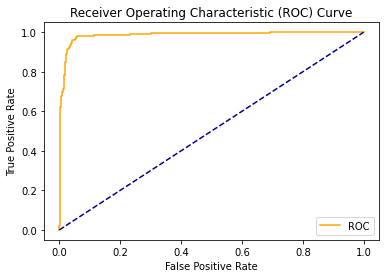

In [19]:
 def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)